# QUESTÃO 1

## BIBLIOTECAS - QUESTÃO 1

In [ ]:
#TRATAMENTO DE DADOS E VISUALIZAÇÃO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

#APRENDIZADO DE MÁQUINA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

## DATASETS

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# PRÉ-PROCESSAMENTO

### TREINO

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### TESTE

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## CÓDIGO PARA CONTAGEM DE VALORES NULOS OU PERDIDOS

### CONTAGEM TREINO

In [ ]:
Contagem = train.isnull().sum().sort_values(ascending=False)
Porcentagem = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)

dados_perdidos = pd.concat([Contagem, Porcentagem], axis=1, keys=['Contagem', 'Porcentagem'])
print('Contagem e porcentagem de valores perdidos no dataset: ')

dados_perdidos

Contagem e porcentagem de valores perdidos no dataset: 


,Contagem,Porcentagem
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


#### DROPA COLUNA CABIN

In [ ]:
train = train.drop(columns=['Cabin'], axis=1)
test = test.drop(columns=['Cabin'], axis=1)

### CONTAGEM TESTE

In [ ]:
Contagem = test.isnull().sum().sort_values(ascending=False)
Porcentagem = ((test.isnull().sum()/len(test)*100)).sort_values(ascending=False)

dados_perdidos = pd.concat([Contagem, Porcentagem], axis=1, keys=['Contagem', 'Porcentagem'])
print('Contagem e porcentagem de valores perdidos no dataset: ')

dados_perdidos

Contagem e porcentagem de valores perdidos no dataset: 


,Contagem,Porcentagem
Age,86,20.574163
Fare,1,0.239234
Pclass,0,0.000000
PassengerId,0,0.000000
Sex,0,0.000000
Name,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Embarked,0,0.000000


## SUBSTITUI VALORES NULOS POR MÉDIA DE CADA COLUNA

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

test['Age'] = test['Age'].fillna(train['Age'].mean())
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

## APÓS PROCESSAMENTO DE VALORES

### CONTAGEM TREINO

In [ ]:
Contagem = train.isnull().sum().sort_values(ascending=False)
Porcentagem = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)

dados_perdidos = pd.concat([Contagem, Porcentagem], axis=1, keys=['Contagem', 'Porcentagem'])
print('Contagem e porcentagem de valores perdidos no dataset: ')

dados_perdidos

Contagem e porcentagem de valores perdidos no dataset: 


,Contagem,Porcentagem
Embarked,2,0.224467
Survived,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Age,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


### CONTAGEM TESTE

In [ ]:
Contagem = test.isnull().sum().sort_values(ascending=False)
Porcentagem = ((test.isnull().sum()/len(test)*100)).sort_values(ascending=False)

dados_perdidos = pd.concat([Contagem, Porcentagem], axis=1, keys=['Contagem', 'Porcentagem'])
print('Contagem e porcentagem de valores perdidos no dataset: ')

dados_perdidos

Contagem e porcentagem de valores perdidos no dataset: 


,Contagem,Porcentagem
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Embarked,0,0.0


In [ ]:
corr = train.corr()
plt.figure()
sns.heatmap(corr)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

## RETIRA COLUNAS DESNECESSÁRIAS

In [ ]:
train = train.drop(columns=['Name', 'Ticket'], axis=1)
test = test.drop(columns=['Name', 'Ticket'], axis=1)

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


## LABEL ENCODER

In [ ]:
cols = ['Sex', 'Embarked']

le = LabelEncoder()

for col in cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.fit_transform(test[col])

In [ ]:
train

In [ ]:
test

## PREPARAÇÃO PARA O MODELO

In [ ]:
X = train.drop(columns=['Survived', 'PassengerId'], axis=1)
y = train['Survived']

# REDE NEURAL

## SEPARAÇÃO ENTRE TREINO E VALIDAÇÃO

In [ ]:
#SEPARA EM TREINO E VALIDAÇÃO
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

## CRIAÇÃO DO MODELO

In [ ]:
#CRIAR MODELO
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=7)) #ENTRADA
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #SAÍDA
#COMPILAR MODELO
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

## EXECUÇÃO DO MODELO

In [ ]:
hist = model.fit(X_train, y_train, epochs=500, validation_data = (X_val,y_val), batch_size=32)

Epoch 1/500
21/21 [==============================] - 3s 13ms/step - loss: 5.0810 - binary_accuracy: 0.6153 - val_loss: 2.5046 - val_binary_accuracy: 0.6188
Epoch 2/500
21/21 [==============================] - 0s 5ms/step - loss: 2.0209 - binary_accuracy: 0.5329 - val_loss: 0.9796 - val_binary_accuracy: 0.4126
Epoch 3/500
21/21 [==============================] - 0s 5ms/step - loss: 0.7906 - binary_accuracy: 0.5389 - val_loss: 0.7230 - val_binary_accuracy: 0.6413
Epoch 4/500
21/21 [==============================] - 0s 6ms/step - loss: 0.6141 - binary_accuracy: 0.6826 - val_loss: 0.7007 - val_binary_accuracy: 0.6233
Epoch 5/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6052 - binary_accuracy: 0.6737 - val_loss: 0.6963 - val_binary_accuracy: 0.6278
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 0.6034 - binary_accuracy: 0.6796 - val_loss: 0.6621 - val_binary_accuracy: 0.6009
Epoch 7/500
21/21 [==============================] - 0s 5ms/step - lo

## GRÁFICO DO ERRO NO TREINO

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Métrica de erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO'])

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

## GRÁFICO DO ERRO COM O CONJUNTO DE VALIDAÇÃO

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Métrica de Erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO','VALIDAÇÃO'])

pred = np.round(model.predict(X_val))
print(f'--> Acuracia (teste): {accuracy_score(y_val, pred):.4f}')

## MATRIZ DE CONFUSÃO - VALIDAÇÃO

In [ ]:
cf = confusion_matrix(y_val, np.round(model.predict(X_val)))

sns.heatmap(cf, annot=True)

In [ ]:
test = test.drop(columns=['PassengerId'], axis=1)

In [ ]:
pred = np.round(model.predict(test))
print(pred)

# QUESTÃO 2

## BIBLIOTECAS - QUESTÃO 2

In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

## MNIST

In [ ]:
# Carregando dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Dividindo o conjunto de treinamento em treinamento e validação (80/20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Exibindo os novos shapes
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_val:   ' + str(X_val.shape))
print('y_val:   ' + str(y_val.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (48000, 28, 28)
y_train: (48000,)
X_val:   (12000, 28, 28)
y_val:   (12000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


## IMAGENS

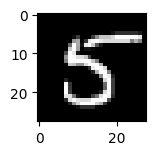

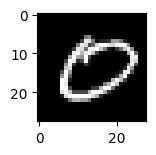

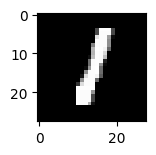

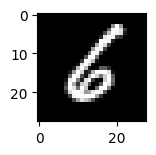

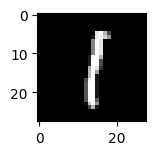

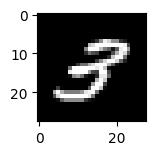

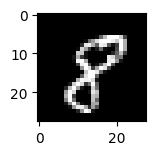

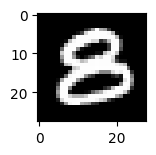

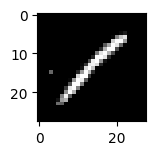

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

## RESHAPE E NORMALIZAÇÃO

In [ ]:
X_train = np.reshape(X_train, [-1, 784])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, 784])
X_test = X_test.astype('float32') / 255
X_val = np.reshape(X_val, [-1, 784])
X_val = X_val.astype('float32') / 255

## CONVERTE LABELS

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

## VARIÁVEIS DA REDE NEURAL

In [ ]:
batch_size = 128
hidden_units = 256

## MODELO

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, activation='relu', input_dim = 784)) #ENTRADA
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(10, activation='softmax')) #SAÍDA

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


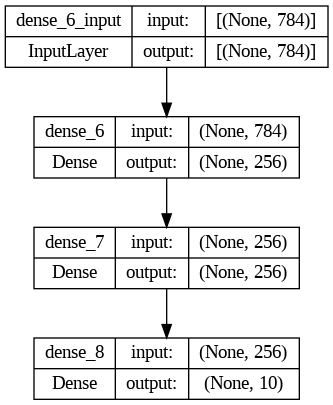

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

## EXECUÇÃO DO MODELO

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=batch_size)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2856 - accuracy: 0.9190 - val_loss: 0.1333 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1086 - accuracy: 0.9675 - val_loss: 0.1053 - val_accuracy: 0.9685
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0689 - accuracy: 0.9785 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.1082 - val_accuracy: 0.9648
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0839 - val_accuracy: 0.9747
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0738 - val_accuracy: 0.9794
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0871 - val_accuracy: 0.9762
Epo

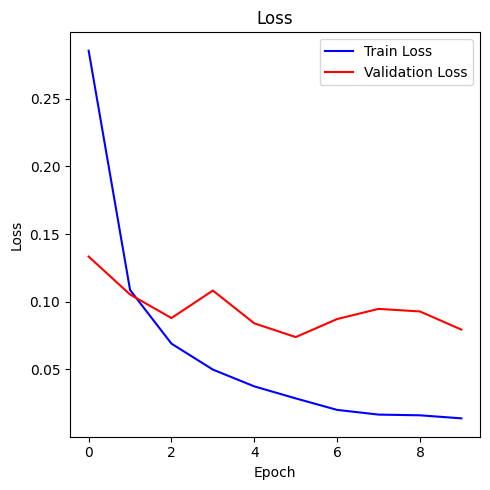

In [ ]:
# Plote o gráfico de perda
plt.figure(figsize=(5, 5))
plt.plot(hist.history['loss'], color='blue', label='Train Loss')
plt.plot(hist.history['val_loss'], color='red', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

## ACURÁCIA NO TESTE

In [ ]:
loss, acc = model.evaluate(X_val, y_val, batch_size=batch_size)
print("\nValidation accuracy: %.1f%%" % (100.0 * acc))


94/94 [==============================] - 0s 5ms/step - loss: 0.0793 - accuracy: 0.9797

Validation accuracy: 98.0%


## MATRIZ DE CONFUSÃO

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 0s 853us/step


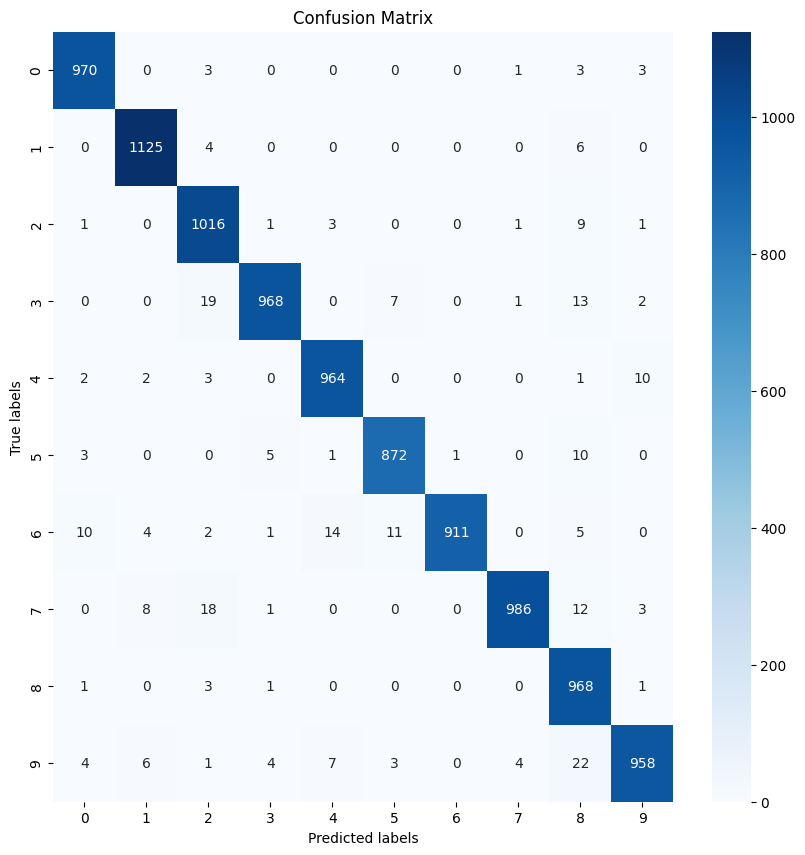

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

# 3. Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(range(10))
ax.yaxis.set_ticklabels(range(10))
plt.show()

## DADOS DA CNN

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
# Carregando dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Dividindo o conjunto de treinamento em treinamento e validação (80/20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Exibindo os novos shapes
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_val:   ' + str(X_val.shape))
print('y_val:   ' + str(y_val.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

X_train: (48000, 28, 28)
y_train: (48000,)
X_val:   (12000, 28, 28)
y_val:   (12000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


## CRIAÇÃO DA CNN

In [ ]:
cnn = Sequential([
Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1)),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Flatten(),
Dense(units=128, activation='relu'),
Dense(units=10, activation='softmax'),
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## EXECUÇÃO DA CNN

In [ ]:
history = cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=256)

Epoch 1/10
188/188 [==============================] - 68s 352ms/step - loss: 0.3420 - accuracy: 0.8960 - val_loss: 0.1003 - val_accuracy: 0.9716
Epoch 2/10
188/188 [==============================] - 58s 308ms/step - loss: 0.0918 - accuracy: 0.9718 - val_loss: 0.0630 - val_accuracy: 0.9818
Epoch 3/10
188/188 [==============================] - 58s 309ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0532 - val_accuracy: 0.9845
Epoch 4/10
188/188 [==============================] - 57s 304ms/step - loss: 0.0529 - accuracy: 0.9838 - val_loss: 0.0434 - val_accuracy: 0.9874
Epoch 5/10
188/188 [==============================] - 58s 311ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 6/10
188/188 [==============================] - 55s 293ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 7/10
188/188 [==============================] - 55s 292ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0372 - val_ac

## GRÁFICO CNN

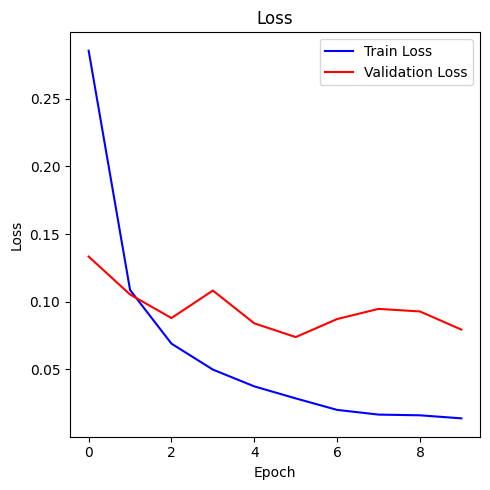

In [ ]:
# Plote o gráfico de perda
plt.figure(figsize=(5, 5))
plt.plot(hist.history['loss'], color='blue', label='Train Loss')
plt.plot(hist.history['val_loss'], color='red', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

## GRÁFICO E TESTE DE PREDIÇÃO

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 4s 14ms/step


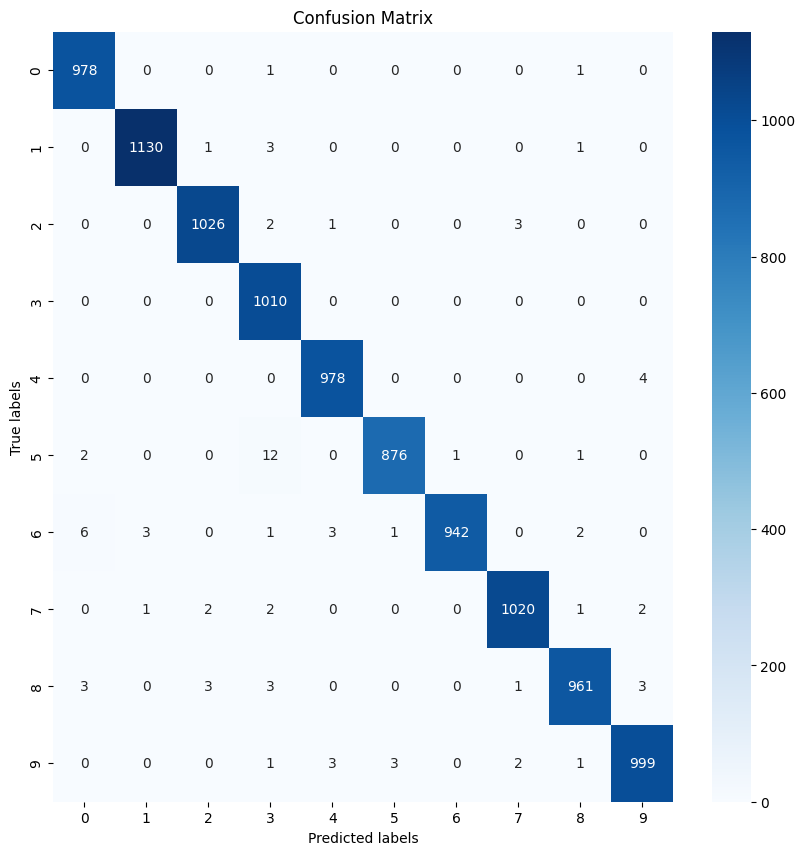

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(range(10))
ax.yaxis.set_ticklabels(range(10))
plt.show()

# QUESTÃO 3

## BIBLIOTECAS - QUESTÃO 3

In [ ]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

## Carregamento dos Dados

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## Divisão dos dados e Print das amostras

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (40000, 32, 32, 3)
Train Labels Shape:       (40000, 1)

Validation Images Shape:  (10000, 32, 32, 3)
Validation Labels Shape:  (10000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


## Converte Pixels and Float; Calcula a media e o desvio padrão, e Normalização

In [ ]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

In [ ]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

## Data augmentation

In [ ]:
data_generator = ImageDataGenerator(
    rotation_range=15,

    width_shift_range=0.12,

    height_shift_range=0.12,

    horizontal_flip=True,

    zoom_range=0.1,

    brightness_range=[0.9,1.1],

    shear_range=10,

    channel_shift_range=0.1,
)

## Criação do modulo e da arquitetura

In [ ]:
model = Sequential()

weight_decay = 0.0001

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

## Define os parametros e Compila o modelo

In [ ]:
batch_size = 64

epochs = 150

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)

Epoch 1/150
625/625 - 65s - loss: 2.4688 - accuracy: 0.3145 - val_loss: 1.7395 - val_accuracy: 0.4424 - lr: 5.0000e-04 - 65s/epoch - 104ms/step
Epoch 2/150
625/625 - 45s - loss: 1.8420 - accuracy: 0.4326 - val_loss: 1.5799 - val_accuracy: 0.4938 - lr: 5.0000e-04 - 45s/epoch - 72ms/step
Epoch 3/150
625/625 - 44s - loss: 1.5744 - accuracy: 0.5059 - val_loss: 1.3824 - val_accuracy: 0.5667 - lr: 5.0000e-04 - 44s/epoch - 70ms/step
Epoch 4/150
625/625 - 43s - loss: 1.3876 - accuracy: 0.5621 - val_loss: 1.1561 - val_accuracy: 0.6229 - lr: 5.0000e-04 - 43s/epoch - 69ms/step
Epoch 5/150
625/625 - 43s - loss: 1.2555 - accuracy: 0.6019 - val_loss: 1.1731 - val_accuracy: 0.6314 - lr: 5.0000e-04 - 43s/epoch - 68ms/step
Epoch 6/150
625/625 - 43s - loss: 1.1667 - accuracy: 0.6322 - val_loss: 1.0861 - val_accuracy: 0.6810 - lr: 5.0000e-04 - 43s/epoch - 68ms/step
Epoch 7/150
625/625 - 43s - loss: 1.0805 - accuracy: 0.6615 - val_loss: 0.9583 - val_accuracy: 0.7076 - lr: 5.0000e-04 - 43s/epoch - 70ms/ste

## Plot do treino e da acuracia

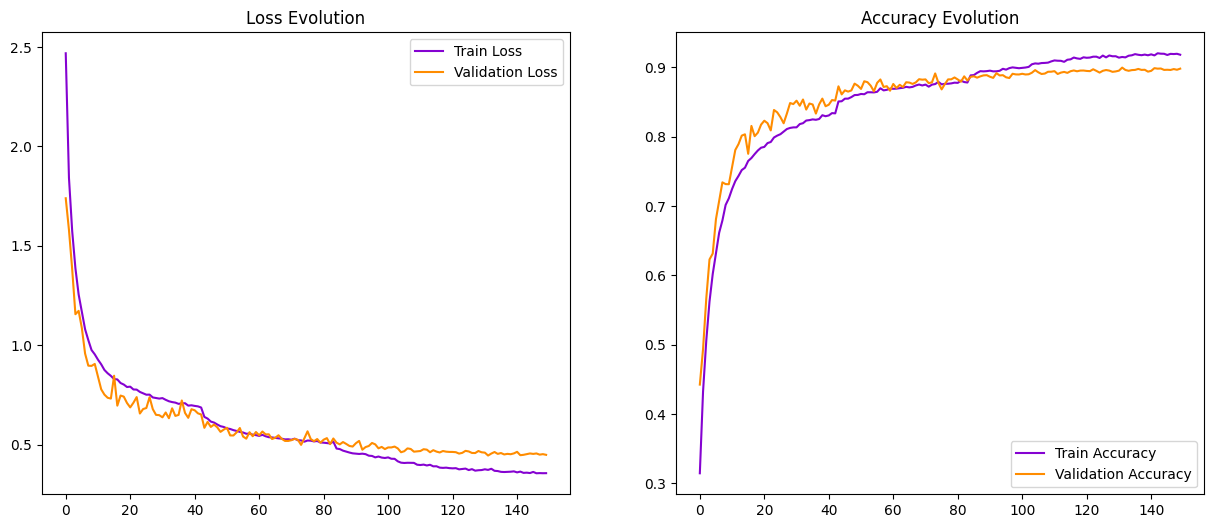

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

## Precisão do modelo

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.4628 - accuracy: 0.8957

Test Accuracy: 0.8956999778747559
Test Loss:     0.46282759308815


313/313 [==============================] - 1s 3ms/step


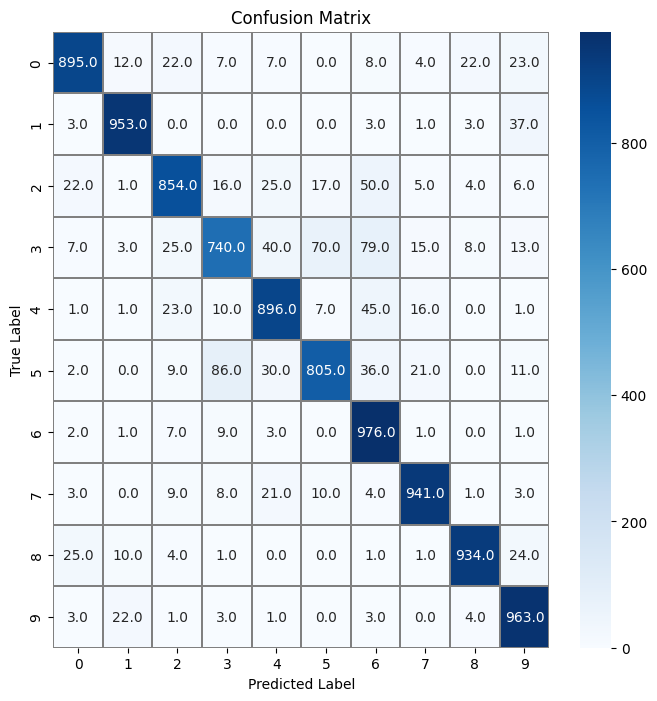

In [ ]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

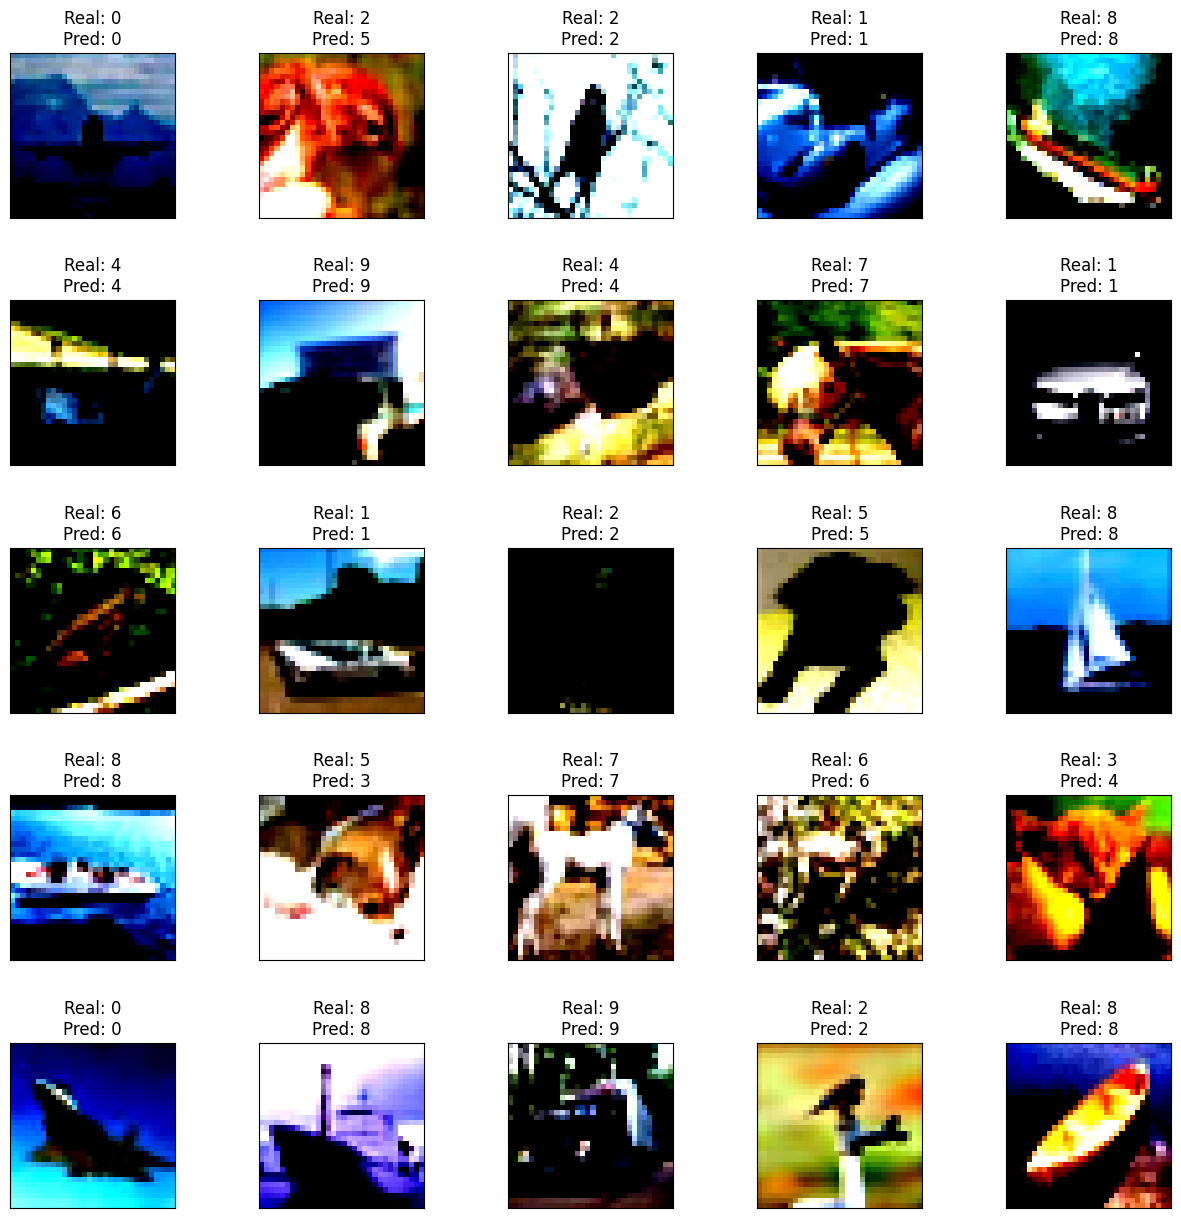

In [ ]:
# Suponha que você tenha os arrays/nomes das categorias reais e preditas como Y_true_names e Y_pred_names
num_images = 25  # Número de imagens para plotar
indices = np.random.choice(range(len(X_test)), num_images, replace=False)  # Selecionar imagens aleatoriamente

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    # Plotar imagem
    # Aqui continuamos a usar as imagens normalizadas, uma vez que o foco é nas categorias
    ax.imshow(X_test[indices[i]], cmap='gray')  # As imagens ainda serão mostradas aqui

    # Titulo com a classe real e a predita
    # Aqui você precisa ajustar para usar suas próprias variáveis de categorias reais e preditas
    ax.set_title(f"Real: {Y_true[indices[i]]}\nPred: {Y_pred_classes[indices[i]]}")

    # Remover eixos
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()